In [1]:
#import library and set-up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%pylab inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('precision',3)
#pd.options.display.float_format = '{:,.4f}'.format

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import data
path = 'C:/Users/AdamChang/Documents/Python/data/PFD Data/BWIBBU_d20171020.csv'
df = pd.read_csv(path, encoding='big5hkscs', skiprows=2,index_col=0,
                names=['Code','Company','ROR','DYear','PER','PBR','Time'])

# 各Column名詞代稱
---
* Code: 股市代號
* Company: 公司名稱
* ROR: 股票殖利率
* DYear: 股利年度
* PER: 本益比
* PBR: 股價淨值比
* Time: 財報年/季

# 資料清理 Tidy Data
---

In [3]:
#tidy data
del df['DYear'] #刪除股利年度
del df['Time'] #刪除財報年/季

df['PER'] = df['PER'].astype(str)
df['PER'] = df.PER.replace({'-':0}) #清除空值的"-"符號

for i in range(len(df['PER'])):
    df['PER'].iloc[i] = df['PER'].iloc[i].replace(',','')
        
df['PER'] = df['PER'].astype(float)

C:\Users\AdamChang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
df.describe()

,ROR,PER,PBR
count,897.000000,897.000000,897.000000
mean,3.567090,31.922140,2.038049
std,2.823641,110.842431,4.459738
min,0.000000,0.000000,0.350000
25%,1.090000,8.830000,0.910000
50%,3.530000,14.380000,1.340000
75%,5.450000,23.610000,2.160000
max,13.920000,2000.000000,92.670000


# 檢視資料的Summary
---
* 對ROR來說，Mean與Median接近，推估股市平均報酬約略3.6%左右
* 對PBR來說，Mean=2.03, Median=1.34，整體市值有較八月底提高
* 本益比平均31

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A24BC9DEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A24BDF1320>]], dtype=object)

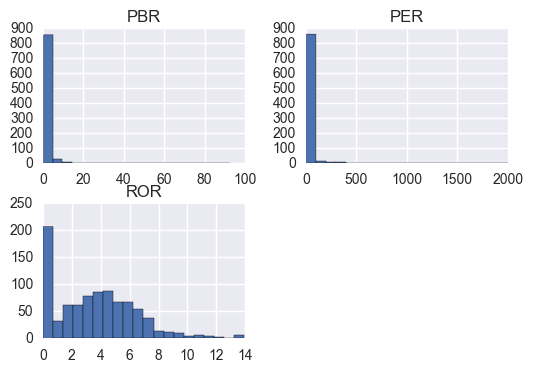

In [5]:
df.hist(bins=20)

` 股票篩選條件:` 
* 篩選PBR < 1.5
* 篩選PER < 18

` 篩選ROR:`
* 篩選殖利率大於平均值5的公司

In [6]:
#Select the data with condition
df2 = df.loc[(df.PBR<1.5)&(df.PER<18)&(df.ROR>5)]

In [7]:
df2.count()

Company    126
ROR        126
PER        126
PBR        126
dtype: int64

In [8]:
df3RORSort = df2.sort_values(by='ROR',ascending=False)
df3RORSort.describe()

,ROR,PER,PBR
count,126.000000,126.000000,126.000000
mean,7.044524,11.145079,1.056032
std,1.880055,4.201961,0.245797
min,5.010000,0.000000,0.530000
25%,5.810000,9.050000,0.865000
50%,6.430000,11.760000,1.045000
75%,7.547500,13.987500,1.242500
max,13.890000,17.880000,1.490000


# 檢視根據篩選條件，ROR前100間的公司

In [9]:
df3RORSort

,Company,ROR,PER,PBR
Code,,,,
3056.0,總太,13.89,6.84,0.85
4984.0,科納-KY,13.68,9.94,0.94
3040.0,遠見,13.25,3.15,1.27
2936.0,客思達-KY,11.73,8.38,0.90
6235.0,華孚,11.50,2.30,1.36
3679.0,新至陞,11.44,9.69,1.32
2488.0,漢平,11.08,7.42,1.42
2489.0,瑞軒,11.07,0.00,1.04
1442.0,名軒,10.64,6.07,0.93
